In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=50, n_features=1, noise=20)


In [3]:
import numpy.linalg
a = np.linalg.inv(X.T @ X) @ X.T @ y

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print(a)

[67.55660968]


In [5]:
a = linreg.coef_
b = linreg.intercept_

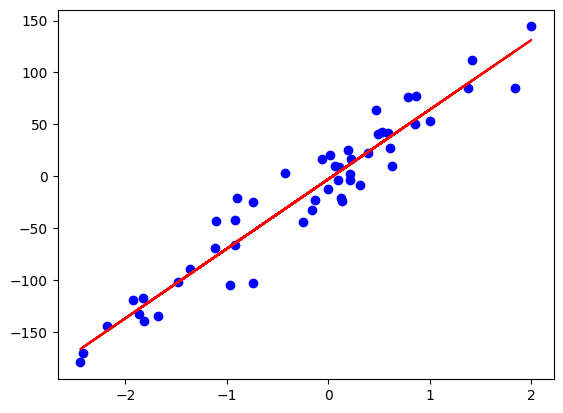

In [6]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'bo')
plt.plot(X, b + a * X, 'r')

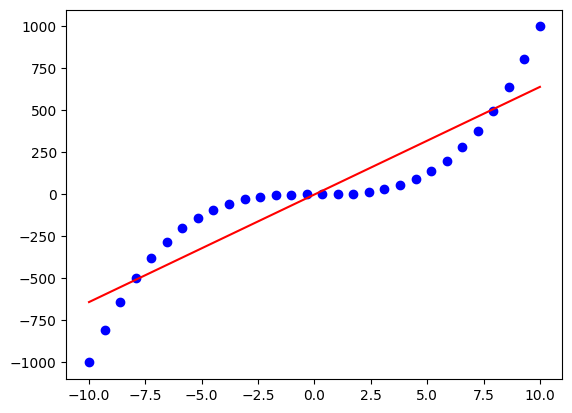

In [7]:
X = np.linspace(-10, 10, 30)
y = X ** 3
plt.plot(X, y, 'bo')
linreg.fit(X.reshape(-1,1), y)
plt.plot (X, linreg.intercept_ + linreg.coef_[0] * X, 'r')

In [8]:
X = X.reshape(-1, 1)
X.shape

(30, 1)

In [9]:
X_new = np.hstack((X, X ** 2, X ** 3))
X_new.shape

(30, 3)

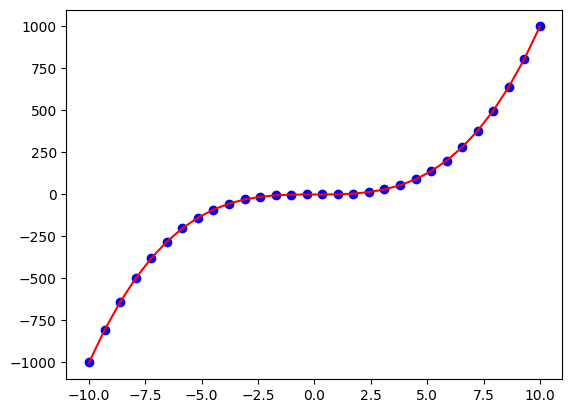

In [10]:
linreg = LinearRegression()
linreg.fit(X_new, y)
plt.plot(X,y,'bo')
plt.plot(X, linreg.intercept_ + linreg.coef_[0] * X + linreg.coef_[1] * X ** 2 + linreg.coef_[2] * X ** 3, 'r')

In [11]:
X = np.linspace(-10, 10, 30).reshape(-1, 1)
y = X ** 4 + np.random.normal(scale=100.0, size=X.shape)

In [12]:
X = X.reshape(-1,1)
X.shape

(30, 1)

In [13]:
X_new = np.hstack((X, X ** 2, X ** 3, X ** 4))
linreg.fit (X_new, y)
linreg.coef_, linreg.intercept_


(array([[-2.59994128, -2.38926269,  0.07212087,  1.01067479]]),
 array([91.78455573]))

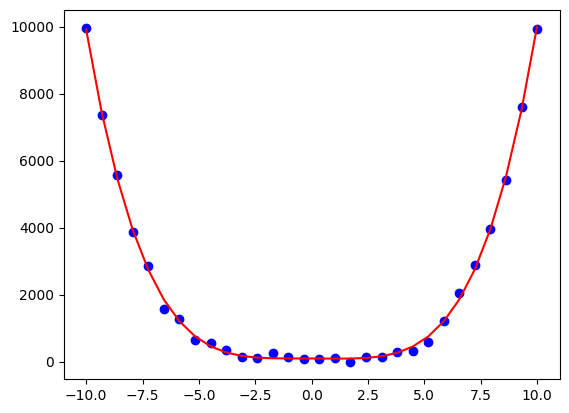

In [14]:
plt.plot (X, y, 'bo')
plt.plot (X, linreg.intercept_  + linreg.coef_[0][0] * X + linreg.coef_[0][1] * X ** 2 + linreg.coef_[0][2] * X ** 3 + linreg.coef_[0][3] * X ** 4, 'r')

In [15]:
#adding train and test data (splitting one dataset in 2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3)


In [16]:
X_new.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30, 4), (21, 4), (21, 1), (9, 4), (9, 1))

In [17]:
linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
linreg.coef_, linreg.intercept_

(array([[-1.06134936, -5.00724694,  0.05116592,  1.03666992]]),
 array([110.21058031]))

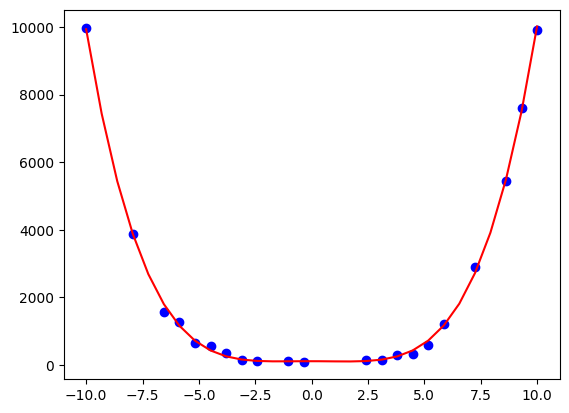

In [19]:
plt.plot (X_train[:,0], y_train, 'bo')
plt.plot (X, linreg.intercept_  + linreg.coef_[0][0] * X + linreg.coef_[0][1] * X ** 2 + linreg.coef_[0][2] * X ** 3 + linreg.coef_[0][3] * X ** 4, 'r')

In [20]:
linreg.score(X_test, y_test)

0.9975248863543085

In [24]:
#kaggle house prices
!python -m wget https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv -o houses_train.csv 
!python -m wget https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv -o houses_test.csv


Saved under houses_train.csv

Saved under houses_test.csv


In [ ]:
import pandas as pd
df = pd.read_csv('houses_train.csv').set_index('Id')

In [35]:
df.corr()['SalePrice'].sort_values() #pandas.DataFrame.corr - Compute pairwise correlation of columns, excluding NA/null values.

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GrLivArea      0.708624
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [36]:
columns = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'SalePrice']
df = pd.read_csv('houses_train.csv').set_index('Id')[columns]

In [38]:
X = df.drop(columns=['SalePrice']).to_numpy() #pandas.DataFrame.drop - Drop specified labels from rows or columns. Remove rows or columns by specifying label names and corresponding axis.
y = df['SalePrice'].to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [45]:
linreg.fit(X_train, y_train)
linreg.coef_, linreg.intercept_

(array([ -8.10482761,  52.15323562, 104.86717801,  67.18746654]),
 -16663.211075705593)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = linreg.predict(X_test) 
mse_linreg = mean_squared_error(y_test, y_pred)
mae_linreg = mean_absolute_error(y_test, y_pred)
print("MSE: {}\n MAE: {}".format(mse_linreg, mae_linreg))

MSE: 2262199922.744918
 MAE: 29434.144218120426


In [55]:
(np.ones_like(y_train) * y_train.mean()).shape #once_like - Return an array of ones with the same shape and type as a given array.

(1241,)

In [59]:
y_mean = np.ones_like(y_test) * y_train.mean()

mse_mean = mean_squared_error(y_test, y_mean)
mae_mean = mean_absolute_error(y_test, y_mean)

print("MSE: {}\n MAE: {}".format(mse_mean, mae_mean))

MSE: 8118981920.319507
 MAE: 63350.94320753259


In [58]:
y_median = np.ones_like(y_test) * np.median(y_train)

mse_median = mean_squared_error(y_test, y_median)
mae_median = mean_absolute_error(y_test, y_median)

print("MSE: {}\n MAE: {}".format(mse_median, mae_median))

MSE: 8355219324.027397
 MAE: 60484.374429223746
